In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import IPython
from IPython.core.display import HTML
from scipy.io import wavfile
import librosa



In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df_speech = pd.read_csv('data/slr/line_index.tsv', sep='\t')
# df_users = pd.read_csv('users.tsv', sep='\t')
df_text = pd.read_csv('data/slr/line_index_male_shuf.tsv', sep='\t')

In [5]:
df_speech.head()

,mlf_02879_01795762363,കൂടുതൽ വിവരങ്ങൾ വരുമ്പോൾ തിരിച്ചു ചേർക്കാം
0,mlf_05401_00863865118,അതിന്റെ വികസിതദശയിൽ ഏതാണ്ട് മുപ്പതോളം ക്ഷേത്രങ...
1,mlf_03132_01162270189,അത്തരം ഏറ്റുപറയൽ അനുരഞ്ജനപ്രക്രിയയുടെ ഭാഗമാണ്
2,mlf_03228_01299568667,ആരെങ്കിലും ആ പൊതുനിലപാട് സ്വീകരിച്ചില്ലെന്നത് ...
3,mlf_06469_02146596867,അദ്ദേഹം നൂറ്റിയിരുപത്തിയേഴ് റണ്ണുകൾ വാരിക്കൂട്ടി
4,mlf_01130_00441435203,അർത്ഥം അയക്കപ്പെട്ടവൻ എന്നാണ്


In [6]:
df_text.head()

,mlm_06515_00528230142,ആ വാദം അലസമനസ്സുകളുടെ തലയിണ ആണെന്നായിരുന്നു അദ്ദേഹത്തിന്റെ പക്ഷം
0,mlm_03993_02131005298,ആഫ്രിക്കൻ സവാന ആനകൾക്ക് പിൻ‌കാലുകളിൽ മൂന്നു വീ...
1,mlm_03048_02016759203,അടിമവ്യവസ്ഥയെ ന്യായീകരിക്കാൻ അദ്ദേഹം ബൈബിളിലെ ...
2,mlm_08822_01353318153,അതുകൊണ്ട് ജോണിന് ഫെബ്രുവരി വരെ കാത്തിരിക്കേണ്ട...
3,mlm_08777_00184632174,തമിഴ് തെലുങ്ക് ചിത്രങ്ങളിലെ ഒരു നടിയാണ് തൃഷ എന...
4,mlm_02501_01210831874,ഇടത് ഉള്ള എക്സിറ്റ് സ്വീകരിക്കുക


In [7]:
df_text.count()

mlm_06515_00528230142                                               2022
ആ വാദം അലസമനസ്സുകളുടെ തലയിണ ആണെന്നായിരുന്നു അദ്ദേഹത്തിന്റെ പക്ഷം    2022
dtype: int64

In [8]:
IPython.display.Audio("data/slr/male/mlm_00269_00156195788.wav")

In [9]:
# Librosa getting started
filename = librosa.util.example_audio_file()

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)


Estimated tempo: 129.20 beats per minute
[ 0.11609977  0.55727891  0.99845805  1.46285714  1.92725624  2.39165533
  2.83283447  3.29723356  3.76163265  4.22603175  4.69043084  5.15482993
  5.61922902  6.08362812  6.52480726  6.98920635  7.45360544  7.91800454
  8.38240363  8.87002268  9.31120181  9.77560091 10.24       10.70439909
 11.14557823 11.60997732 12.07437642 12.53877551 13.0031746  13.4675737
 13.93197279 14.39637188 14.83755102 15.27873016 15.74312925 16.20752834
 16.67192744 17.11310658 17.60072562 18.04190476 18.52952381 18.97070295
 19.43510204 19.89950113 20.36390023 20.80507937 21.29269841 21.73387755
 22.2214966  22.66267574 23.12707483 23.59147392 24.05587302 24.49705215
 24.96145125 25.42585034 25.91346939 26.35464853 26.81904762 27.28344671
 27.7478458  28.18902494 28.65342404 29.11782313 29.60544218 30.06984127
 30.53424036 30.9754195  31.43981859 31.88099773 32.36861678 32.83301587
 33.29741497 33.7385941  34.2029932  34.66739229 35.13179138 35.57297052
 36.0605895

In [11]:
y, sr = librosa.load("data/slr/male/mlm_00269_00156195788.wav")
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

Estimated tempo: 161.50 beats per minute
[0.23219955 0.60371882 0.9752381  1.34675737 1.69505669 2.04335601
 2.41487528 2.7631746  3.13469388 3.50621315 3.87773243 4.22603175]


In [12]:
print(f"Sample rate  :", sr)
print(f"Signal Length:{len(y)}")
print(f"Duration     : {len(y)/sr}seconds")

Sample rate  : 22050
Signal Length:109778
Duration     : 4.97859410430839seconds


In [13]:
print("Type  :", type(y))
print("Signal: ", y)
print("Shape :", y.shape)

Type  : <class 'numpy.ndarray'>
Signal:  [-0.00027485 -0.00039868 -0.00034642 ... -0.00019325 -0.00017876
  0.        ]
Shape : (109778,)


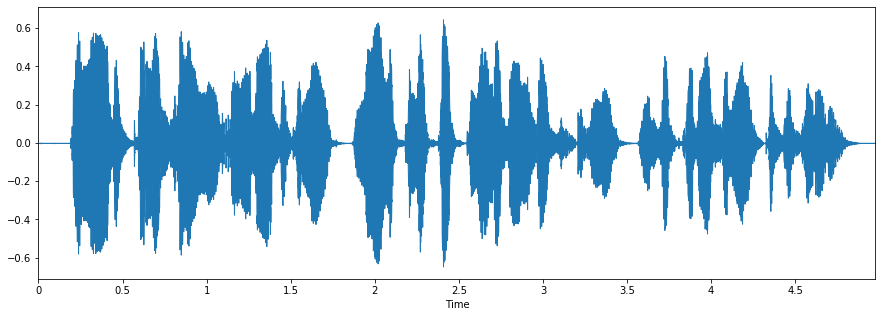

In [14]:
import librosa.display
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr=sr)

### Spectogram

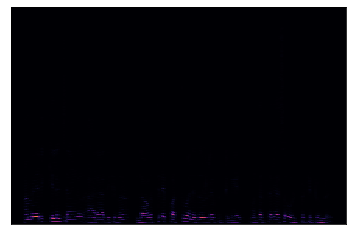

In [15]:
sg0 = librosa.stft(y)
sg_mag, sg_phase = librosa.magphase(sg0)
display(librosa.display.specshow(sg_mag))

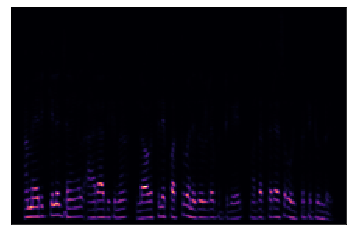

In [16]:
sg1 = librosa.feature.melspectrogram(S=sg_mag, sr=sr)
display(librosa.display.specshow(sg1))

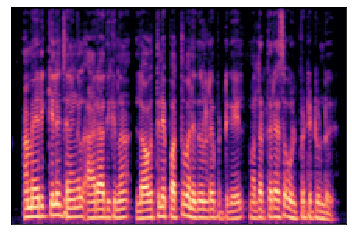

In [17]:
sg2 = librosa.amplitude_to_db(sg1, ref=np.min)
librosa.display.specshow(sg2)

In [18]:
# librosa.amplitude_to_db?

Text(0.5, 1.0, 'Mel spectrogram')

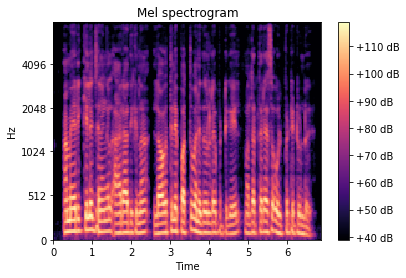

In [19]:
# code adapted from the librosa.feature.melspectrogram documentation
librosa.display.specshow(sg2, sr=16000, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')

In [20]:
sg2.min(), sg2.max(), sg2.mean()

(38.872086, 118.872086, 64.40574)

In [21]:
print(type(sg2))
sg2.shape

<class 'numpy.ndarray'>


(128, 215)

## References

- [FastAI audio Introductory](https://github.com/mogwai/fastai_audio/blob/master/tutorials/01_Intro_to_Audio.ipynb)
- [Librosa docs](https://librosa.github.io/librosa/index.html)


## fin for now